In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
df.info()
# Il y a 23 colonnes en tout, et 145 460 lignes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
df.isna().sum()
# Aucun NaN dans les deux premières colonnes, mais beaucoup partout ailleurs.

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
# Pourcentage de Nan par colonne
round(df.isna().sum()/df.shape[0]*100, 2).sort_values(ascending = False)

Sunshine         48.01
Evaporation      43.17
Cloud3pm         40.81
Cloud9am         38.42
Pressure9am      10.36
Pressure3pm      10.33
WindDir9am        7.26
WindGustDir       7.10
WindGustSpeed     7.06
Humidity3pm       3.10
WindDir3pm        2.91
Temp3pm           2.48
RainTomorrow      2.25
Rainfall          2.24
RainToday         2.24
WindSpeed3pm      2.11
Humidity9am       1.82
Temp9am           1.21
WindSpeed9am      1.21
MinTemp           1.02
MaxTemp           0.87
Location          0.00
Date              0.00
dtype: float64

In [5]:
#Exploration de la colonne 'Location'
df['Location'].value_counts().shape
# Il y a 49 endroits différents.

(49,)

In [6]:
np.sort(df['Location'].unique())
# Il n'y a pas de problèmes de saisie, tous les endroits sont bien identifiés.

array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object)

In [7]:
# Exploration de la colonne 'WindGustDir'
df['WindGustDir'].unique()


array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [8]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [9]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [10]:
# Ce sont bien les mêmes directions.

In [11]:
df.duplicated().value_counts()
#Il n'y a aucun doublon.

False    145460
Name: count, dtype: int64

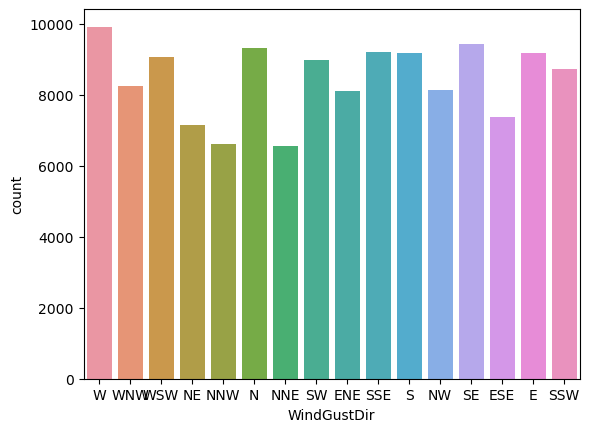

In [12]:
sns.countplot(x = df['WindGustDir'])
plt.show()

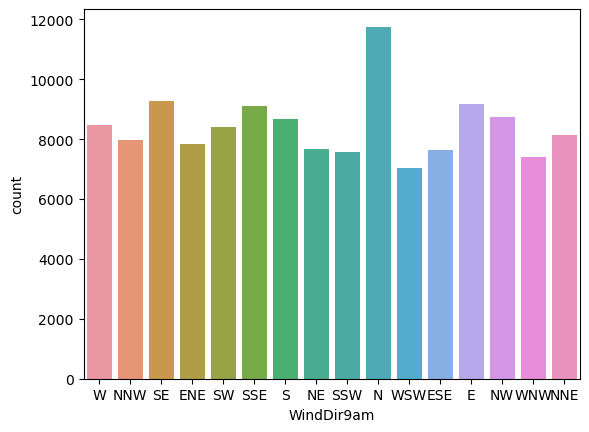

In [13]:
sns.countplot(x = df['WindDir9am'])
plt.show()
#Il ya une sur-représentation du vent N à 9am. Normal ou pas?

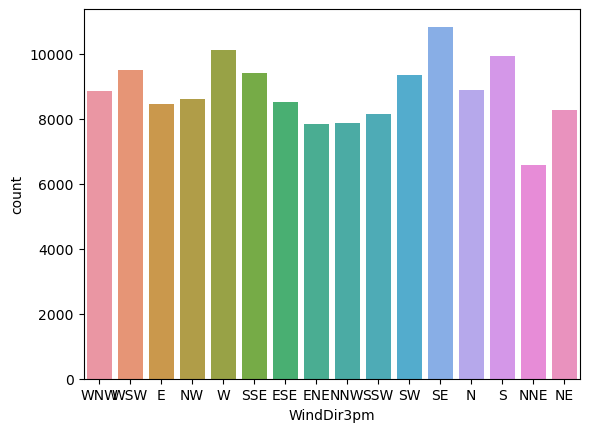

In [14]:
sns.countplot(x = df['WindDir3pm'])
plt.show()

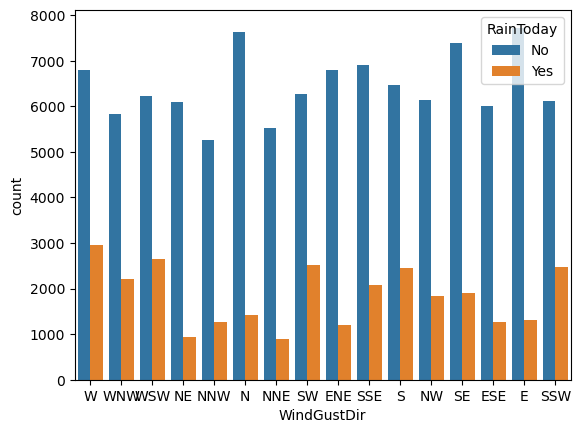

In [15]:
sns.countplot(x = df['WindGustDir'], hue = df['RainToday'])
plt.show()

In [16]:
# Exploration des colonnes Rain:

In [17]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
df['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [19]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [21]:
df['RainTomorrow'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 145460 entries, 0 to 145459
Series name: RainTomorrow
Non-Null Count   Dtype 
--------------   ----- 
142193 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


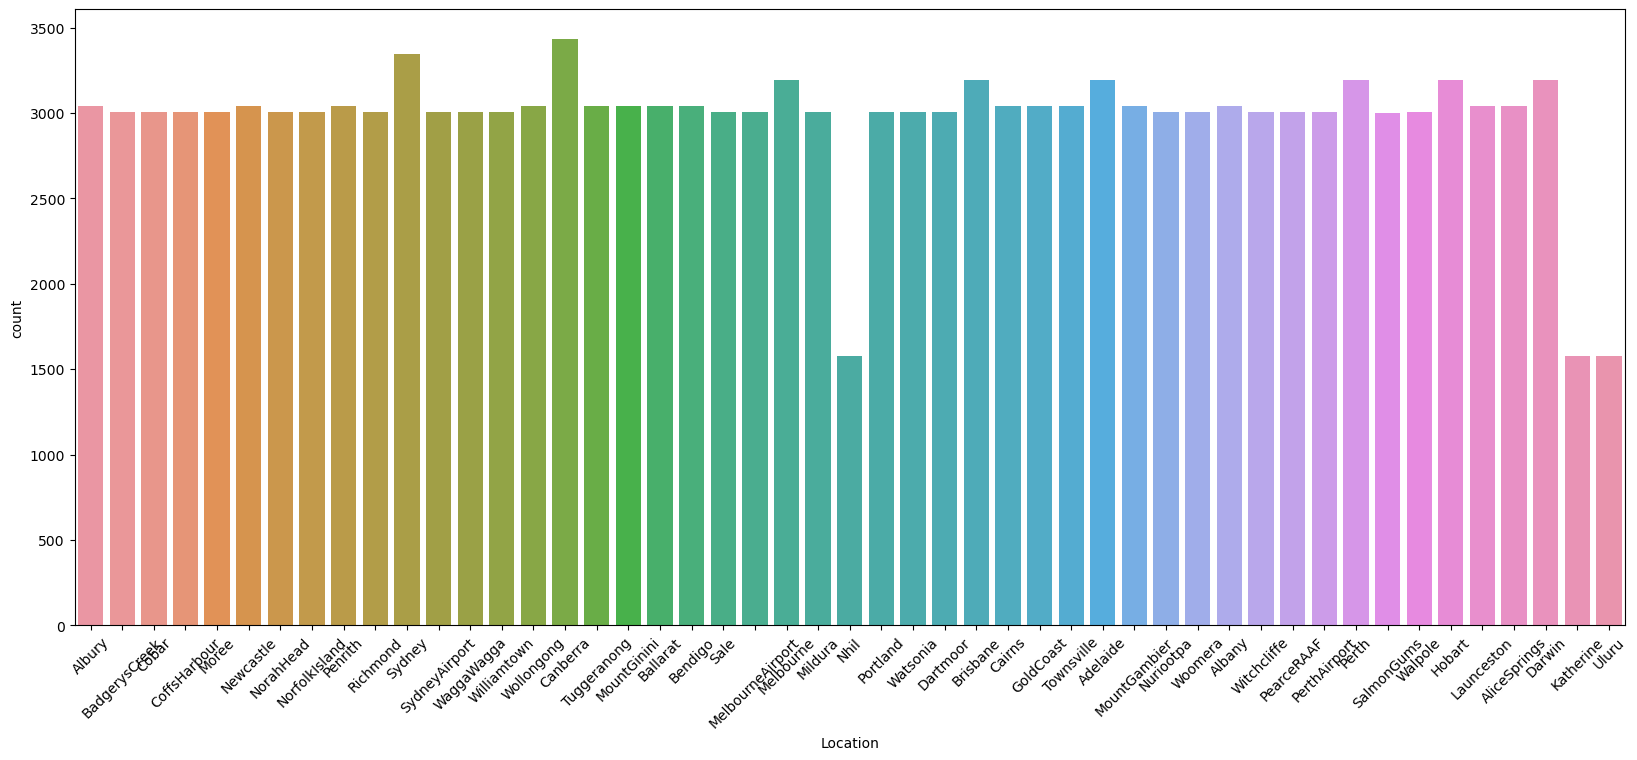

In [22]:
plt.figure(figsize = (20, 8))
sns.countplot(x = df['Location'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

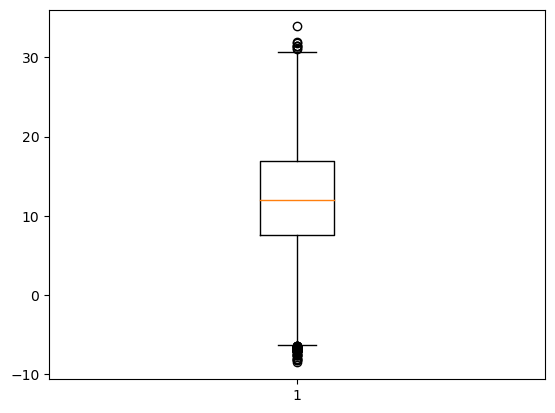

In [23]:
mintemp = df['MinTemp'].dropna()
plt.boxplot(mintemp)
plt.show()

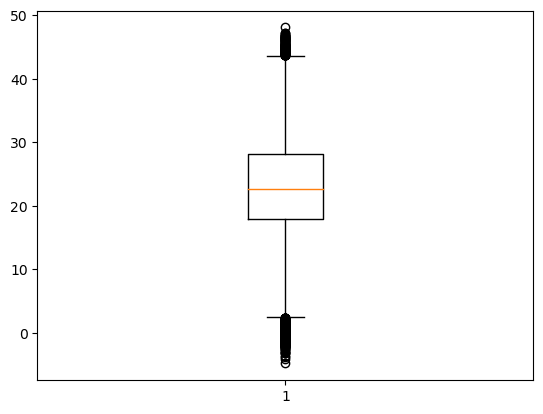

In [24]:
maxtemp = df['MaxTemp'].dropna()
plt.boxplot(maxtemp)
plt.show()

In [25]:
max_day_count = df.groupby("Location").nunique().max(axis = 0).loc["Date"]

print("Il y a un maximum de", max_day_count, "jours uniques.")

Il y a un maximum de 3436 jours uniques.
